<a href="https://colab.research.google.com/github/veritaem/DS-Sprint-01-Dealing-With-Data/blob/master/module4-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have twice as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site // 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.2 + (time_on_site // 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site seems to have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/veritaem/DS-Sprint-01-Dealing-With-Data/master/module4-databackedassertions/persons.csv')
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [91]:
df2 = df.drop(columns = ['Unnamed: 0'])
df2.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


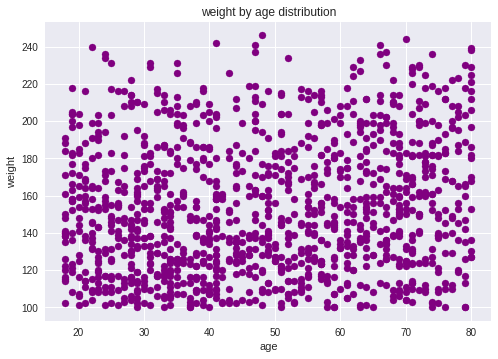

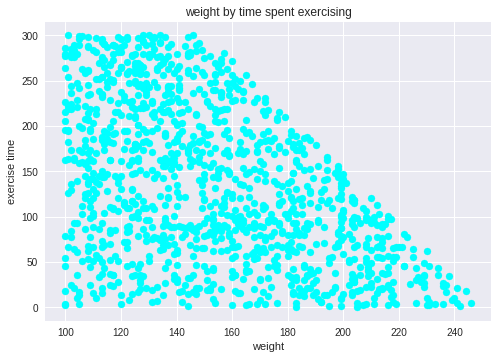

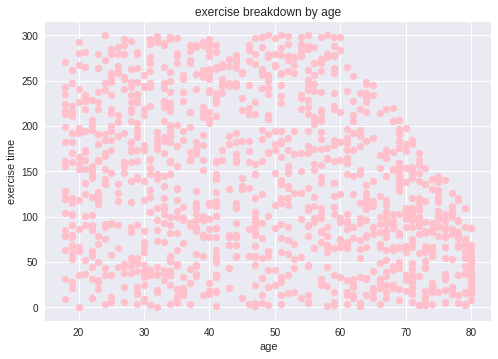

In [92]:
'''lets begin by plotting each variable with its neighbors to give us a basic
idea of our data and what kind of trends we should expect'''

plt.scatter(df['age'], df['weight'], color = 'purple')
plt.xlabel('age')
plt.ylabel('weight')
plt.title('weight by age distribution')
plt.show()

plt.scatter(df['weight'], df['exercise_time'], color = 'cyan')
plt.xlabel('weight')
plt.ylabel('exercise time')
plt.title('weight by time spent exercising')
plt.show()

plt.scatter(df['age'], df['exercise_time'], color = 'pink')
plt.xlabel('age')
plt.ylabel('exercise time')
plt.title('exercise breakdown by age')
plt.show()

In [0]:
#getting groups for the data and converting those back into dataframes

group_aw=df2['age'].groupby(df2['weight'])
group_we=df2['weight'].groupby(df2['exercise_time'])
group_ae=df2['age'].groupby(df2['exercise_time'])
group_wa=df2['weight'].groupby(df2['age'])
group_ew=df2['exercise_time'].groupby(df2['weight'])
group_ea=df2['exercise_time'].groupby(df2['age'])

group_aw_count = group_aw.count()
group_we_count = group_we.count()
group_ae_count = group_ae.count()
group_wa_count = group_wa.count()
group_ew_count = group_ew.count()
group_ea_count = group_ea.count()

In [0]:
age_bins = pd.cut(df['age'], 5)
weight_bins = pd.cut(df['weight'], 6)
exercise_bins = pd.cut(df['exercise_time'], 12)

In [0]:
ct_aw = pd.crosstab(age_bins, weight_bins)
ct_ae = pd.crosstab(age_bins, exercise_bins)
ct_we = pd.crosstab(weight_bins, exercise_bins)
ct_wa = pd.crosstab(weight_bins, age_bins)
ct_ea = pd.crosstab(exercise_bins, age_bins)
ct_ew = pd.crosstab(exercise_bins, weight_bins)

In [0]:
#now lets analyze those trends we saw earlier, but with all three variables in 
#it!

ct = pd.crosstab(exercise_bins, [df2['age'], df2['weight']],
                 normalize = 'columns').plot(kind = 'bar', stacked = False)

ct
#Cant get this one to execute, it just runs until i give up... is it an issue int he code or just slow as heck? 

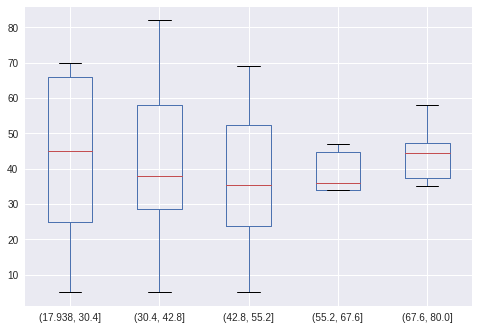

In [97]:
ct_wa.boxplot()
#this shows that weight fluctuates less as you age, suggesting that excercise may play 

AxesSubplot(0.125,0.125;0.775x0.755)


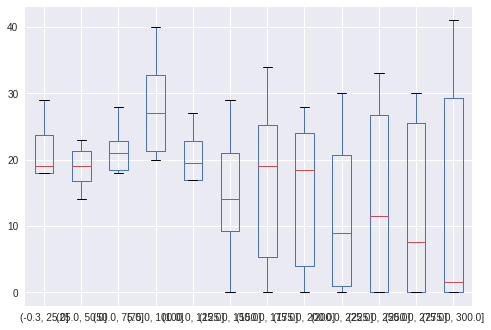

In [98]:
print(ct_we.boxplot())
#this shows that as exercise increases, weight as a group trends down, but actually fluctuated more!

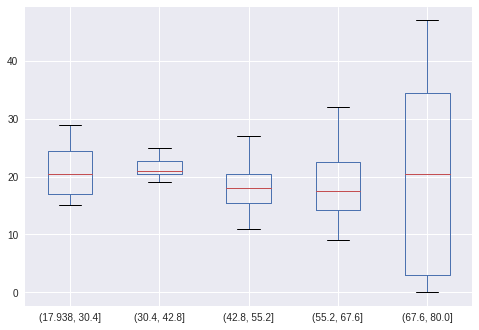

In [99]:
ct_ea.boxplot()
#this shows that exercise follows a trend:at first exercise is quite a bit,
#then it decreases in ealy-middle to middle age before slowly growing the rest
#of your life.  This is somewhat expected, given the time constraints the age
#groups have.

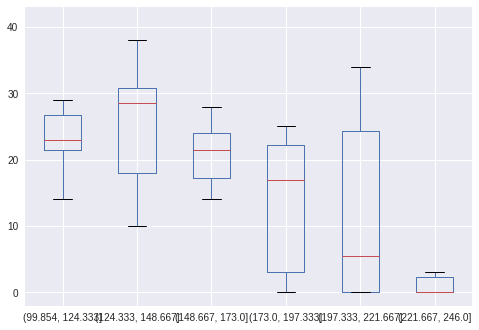

In [100]:
ct_ew.boxplot()
#shows that for the most part, the more you weigh the less you exercise!

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

continuous variables that show a persons weight, and their exercise time, and a discrete number for the age

2.  What are the relationships between the variables?

age and exercise have a negative correlation after 55(as age goes up past this number, exercise goes down).

weight and exercise are also negatively correlated past 145 lbs or so(the more you exercise the less you weigh).

age and weight seems to be more or less noise(your age is not as important to your weight as your exercise).

3.  Which relationships are "real", and which spurious?

weight and excercise time are far more correlated than weight and age, and weight and exercise time are not as closely correlated as exercise time and age.




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspierd by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)